**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Haoyu Fu
- Qianxia Hui
- Arianna Morris
- Michael Tang
- Bofu Zou

# Research Question

Does parking occupancy on the UCSD campus predict traffic incidents on major roads near the UCSD campus?

## Background and Prior Work

Traffic incidents are always a significant concern in modern cities, especially in densely populated areas. As a large institution with a growing population, the University of California, San Diego (UCSD) campus tackles the problems brought by heavy vehicular traffic and parking. As the campus community grows, the parking occupancy rates may reflect the number of traffic incidents happening around the campus area. Our study seeks to find out whether there’s a correlation between the UCSD campus parking occupancy rates and the traffic incidents happening surrounding campus. 

While our topic is mainly focused on how parking occupancy may predict the occurrence of traffic collisions within the area of UCSD, there have been prior studies that analyze the likelihood of car accidents occurring in a given geographic region. For example, Forbes Advisor compiled a list of the top 50 U.S. cities with the highest likelihood of getting into a car accident, with San Diego being one of them.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This ranking system was determined by data for fatality rate per 100,000 people from the National Highway Transportation Safety Administration and average years between collisions and relative collision likelihood from the AllState Best Drivers Index. This data analysis only focuses on urban cities, which means the dataset is relatively small as only the 50 largest cities by population from census data were chosen. A general understanding of a particular city's collision danger is approximated by comparison to other major cities in the dataset. Forbes Advisor’s primary goal is providing financial advice, which this data analysis does by offering relevant information about collisions that may involve insurance, lawyer/attorney, and risk assessment situations. 

Another study investigated the causal relationship between road density and parking occupancy.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Tunisian researchers conducted a research paper to investigate the causal relationship between road density and parking occupancy in Tunis city center using Granger causality tests based on vector error correction modeling. The authors collected data using video cameras around a major street in the capital of Tunis, and found that there does exist a causal relationship between road density and parking occupancy, with road density Granger-causing parking occupancy. This suggests that increasing road density may lead to an increase in parking occupancy, which in turn may lead to an increase in road congestion. The authors suggest that their findings can be used to develop more sustainable parking policies that reduce road congestion and can be incorporated into parking models to improve their accuracy and effectiveness. This study provides important insights into the relationship between road density and parking occupancy, and gives us some ideas for our own project since road density and traffic incidents are two significant features of a city’s traffic conditions.

Similarly, we want to assess what the general level of safety associated with traffic collisions might be through exploring a more confined geographical area that is of interest to us, UCSD. Based upon these prior works and the UCSD campus parking occupancy and nearby traffic incidence data, our project aims to identify patterns specific to UCSD campus and its surrounding areas. We will conduct a descriptive and exploratory data analysis of these datasets, which will allow us to identify important features of the datasets and how they may relate to one another. We aim to contribute to the existing literature on road safety and how it impacts us on the UCSD campus. 

**References:**

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Christy Bieber, J. D. (2023, October 25). The cities where you’re most likely to get in a car accident. Forbes. https://www.forbes.com/advisor/legal/auto-accident/cities-most-car-accidents/  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Hassine, S. B., Kooli, E., & Mraihi, R. (2022). The causal relationship between road density and parking occupancy. World Journal of Advanced Research and Reviews, 15(3), 125–134. https://wjarr.com/sites/default/files/WJARR-2022-0896.pdf


# Hypothesis


We hypothesize that there will be a positive correlation between the number of cars parked on campus and the amount of traffic incidents occurring on and around the UCSD campus. We believe this because more congestion within the campus area could lead to more traffic incidents occurring.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Survey of Parking Space Occupancy Levels
  - Link to the dataset: https://rmp-wapps.ucsd.edu/TS/Survey/Survey%20of%20Parking%20Space%20Occupancy%20Levels/Quarterly%20Tables/Contents.html 
  - Number of observations: 93 (quarterly tables)
  - Number of variables: 15 ("University-Wide" data)

There are a total 93 observations in this dataset, with each consisting of the parking occupancy levels of UCSD parking lots of a given quarter at UCSD, from Summer 2000 to Summer 2023. However, we only plan to utilize 29 of the observations, from Summer 2016 to Summer 2023, to stay consistent with the data we have in Dataset #2. We started by scraping the dataset link for the 29 observations we wanted, and combined those 29 observations into one csv file (QbyQ UCSD Parking Occupancy.csv) to make our data analysis easier. For each row (observation) in our csv file, we have 15 columns (variables) which covers information including parking spaces in total, empty parking spaces listed in hourly time, and occupancy proportion at peak time (important feature that could be utilized along with another dataset). The variables all have the same datatype: numerical variables. After creating our own csv file from the weblink, we have a dataset we integrated ourselves, so we didn't need to do much data cleaning. Since we weren't interested in the columns that display parking occupancy in hourly time, we dropped those columns from the dataset.

- Dataset #2
  - Dataset Name: Traffic collisions details (2015 through year-to-date)
  - Link to the dataset: https://data.sandiego.gov/datasets/police-collisions-details/
  - Number of observations: 123,708
  - Number of variables: 22

This dataset encompasses traffic collision details in the San Diego area (including the vicinity of UCSD) from 2015 to the present, with a total of 123,708 observations and 22 variables. The important variables in the dataset include time stamp of the collision, location details, violation type,  number of injuries and fatalities. The data types include categorical variables (violation type), numerical variables (number of injuries and fatalities), and time variables. The dataset can serve as a proxy for understanding traffic conditions and traffic safety in the area. We needed to clean the dataset by filtering location (street names) in the dataset to find collisions that happen on the major streets in UCSD surrounding area. Then we handled missing values, converting data type, and removing irrelevant variables. Additionally, we transformed the ISO 8601 formatted dates into dates that fit into our quarter-by-quarter analysis according to UCSD's quarter dates for the 2016-2023 school years. We then dropped the date_time columns and added our own column with the quarter-formatted dates. We also had to drop rows containing data for the Fall 2023 quarter, as it is still ongoing and it wouldn't make sense to make an analysis on this data.

## Dataset #1: Quarter by Quarter UCSD Parking Occupancy Dataset

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
## Import csv file with parking data
parking_data = pd.read_csv('QbyQ UCSD Parking Occupancy.csv', 
                            usecols = ['Quarter', 'Year', 'Parking Spaces', 
                                    'Empty Spaces', 'Occupied Spaces', '% Occupied'])

## Rename the column names
parking_data = parking_data.rename(columns={'Quarter':'quarter', 'Year':'year', 
                     'Parking Spaces':'parking_spaces', 'Empty Spaces':'empty_spaces', 
                     'Occupied Spaces':'occupied_spaces', '% Occupied':'percent_occupied'})
parking_data

,quarter,year,parking_spaces,empty_spaces,occupied_spaces,percent_occupied
0,Summer,2016,19297,6567,12730,65.97%
1,Fall,2016,19245,3578,15667,81.41%
2,Winter,2017,18316,2691,15625,85.31%
3,Spring,2017,18334,3096,15238,83.11%
4,Summer,2017,18082,5050,13032,72.07%
5,Fall,2017,18011,2313,15698,87.16%
6,Winter,2018,18105,2385,15720,86.83%
7,Spring,2018,18092,2504,15588,86.16%
8,Summer,2018,17107,4466,12641,74.00%
9,Fall,2018,17408,3052,14356,82.47%


## Dataset #2: San Diego PD Traffic Collision Details Dataset

In [26]:
## Import csv file with collision data
collision_data = pd.read_csv('https://seshat.datasd.org/traffic_collision_details/pd_collisions_details_datasd.csv', usecols = ['date_time', 'address_road_primary', 'injured', 'killed'], parse_dates = ['date_time'])
collision_data.head()

,date_time,address_road_primary,injured,killed
0,2015-01-14 20:00:00,JUNIPER,0,0
1,2015-03-19 12:00:00,LINDA VISTA,0,0
2,2015-03-24 03:05:00,WASHINGTON,2,0
3,2015-03-27 23:56:00,WORDEN,1,0
4,2015-07-06 11:45:00,EL CAJON,0,0


In [27]:
## Filter datasset to include only relevant street names for analysis
collision_data['address_road_primary'] = collision_data['address_road_primary'].apply(lambda x: str.lower(str(x)))
street_names = ['genesee', 'gilman', 'hopkins', 'la jolla farms', 
                'la jolla scenic', 'la jolla scenic dr north', 
                'la jolla scenic n', 'la jolla village', 'lebon', 
                'nobel', 'north torrey pines', 'regents', 
                'villa la jolla', 'voigt']
collision_data = collision_data[collision_data['address_road_primary'].isin(street_names)]
collision_data

,date_time,address_road_primary,injured,killed
50,2016-07-06 00:01:00,la jolla village,0,0
87,2016-07-29 15:27:00,genesee,0,0
88,2016-07-29 15:27:00,genesee,0,0
134,2016-08-05 07:30:00,nobel,1,0
149,2016-08-06 20:39:00,nobel,1,0
...,...,...,...,...
124974,2022-08-06 18:47:00,genesee,1,0
125019,2023-01-13 20:56:00,regents,0,0
125022,2023-01-22 12:19:00,genesee,1,0
125106,2023-10-28 23:18:00,genesee,0,0


In [28]:
# Extract the year for collision_data
collision_data['date_time'] = pd.to_datetime(collision_data['date_time'])
collision_data["year"] = collision_data['date_time'].dt.year
collision_data.dtypes

# Extract the quarter time from UCSD_Quarter_Dates
quarter_dates = pd.read_csv("UCSD_Quarter_Dates.csv")
quarter_dates["Start_date"] = pd.to_datetime(quarter_dates['Start'])
quarter_dates["End_date"] = pd.to_datetime(quarter_dates['End'])

def quarter_check(date):
    for row in quarter_dates.values:
        if date >= row[3] and date <= row[4] + pd.Timedelta(days=1):
            return row[0]
    return None

# Extract the quarter for collision_data
collision_data["quarter"] = collision_data["date_time"].apply(quarter_check)
collision_data = collision_data.dropna(subset=["quarter"])
collision_data = collision_data[["year", "quarter", "address_road_primary", "injured", "killed"]]
collision_data = collision_data.drop(collision_data[(collision_data['quarter'] == 'Fall') & (collision_data['year'] == 2023)].index)

collision_data

,year,quarter,address_road_primary,injured,killed
50,2016,Summer,la jolla village,0,0
87,2016,Summer,genesee,0,0
88,2016,Summer,genesee,0,0
134,2016,Summer,nobel,1,0
149,2016,Summer,nobel,1,0
...,...,...,...,...,...
124857,2021,Fall,nobel,1,0
124871,2021,Fall,regents,1,0
124974,2022,Summer,genesee,1,0
125019,2023,Winter,regents,0,0


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Dataset 1: Occupied parking spaces per quarter

First, we will generate summary statistics regarding percentage of occupied spots by quarter and year on the UCSD campus. This will help us to first understand the basics of our data.

In [40]:
parking_data['percent_occupied'].describe()

count    29.000000
mean     73.096207
std      13.601178
min      39.410000
25%      65.970000
50%      79.000000
75%      83.110000
max      90.610000
Name: percent_occupied, dtype: float64

Based upon these statistics, we can see that we have data for 29 quarters, wherein the average parking occupancy falls at 73%. The minimum value for parking occupancy is 39% occupied, and the maximum is 90%. Next, we will generate a barplot that will allow us to visualize any outliers in the data, or any trends within the data that we may not see within the summary statistics. 

In [30]:
# remove percentage signs from column 
parking_data['percent_occupied'] = parking_data['percent_occupied'].str.replace('%', '')

# convert to float values
parking_data['percent_occupied'] = pd.to_numeric(parking_data['percent_occupied'])

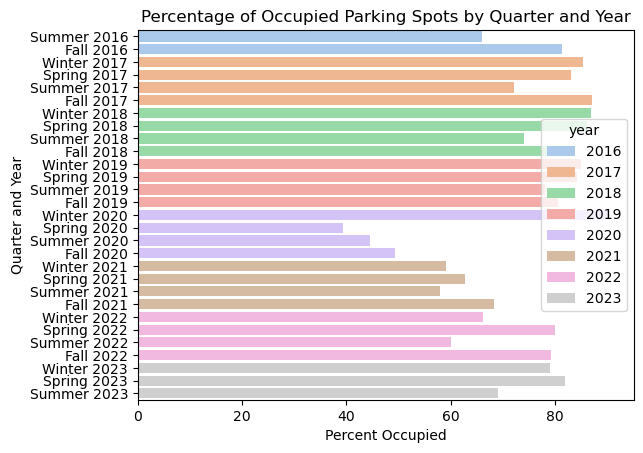

In [31]:
# make copy of DF
occupied = parking_data.copy()

# concat quarter and year columns 
occupied['quarter_year'] = occupied['quarter'].str.cat(occupied['year'].astype(str), sep = ' ')

# create plot w labels using dodge to set hue of bars to year without adjusting bar width
sns.barplot(data=occupied, x='percent_occupied', y='quarter_year', hue='year', dodge=False, palette='pastel')
plt.title('Percentage of Occupied Parking Spots by Quarter and Year')
plt.xlabel('Percent Occupied')
plt.ylabel('Quarter and Year')
plt.show()

We can see based upon this figure that while parking occupancy remains relatively stable between 60%-80% occupied in accordance with the mean value of 73% occupied, in the spring 2020 quarter, there begins a significant dip in occupancy, where our minimum value (39% occupancy) occurs. This is likely due to the switch to online learning that occured during this time. As on campus activities resume, parking occupancy slowly returns to values between 60%-80% again. 

### Dataset 1: Proportion of occupied parking spaces per quarter (grouped)

We sets up a 2x2 grid of subplots and iterates through the quarters first, then creating the boxplot for the percent_occupied for each quarter. 

ValueError: Could not interpret input 'quarter_year'

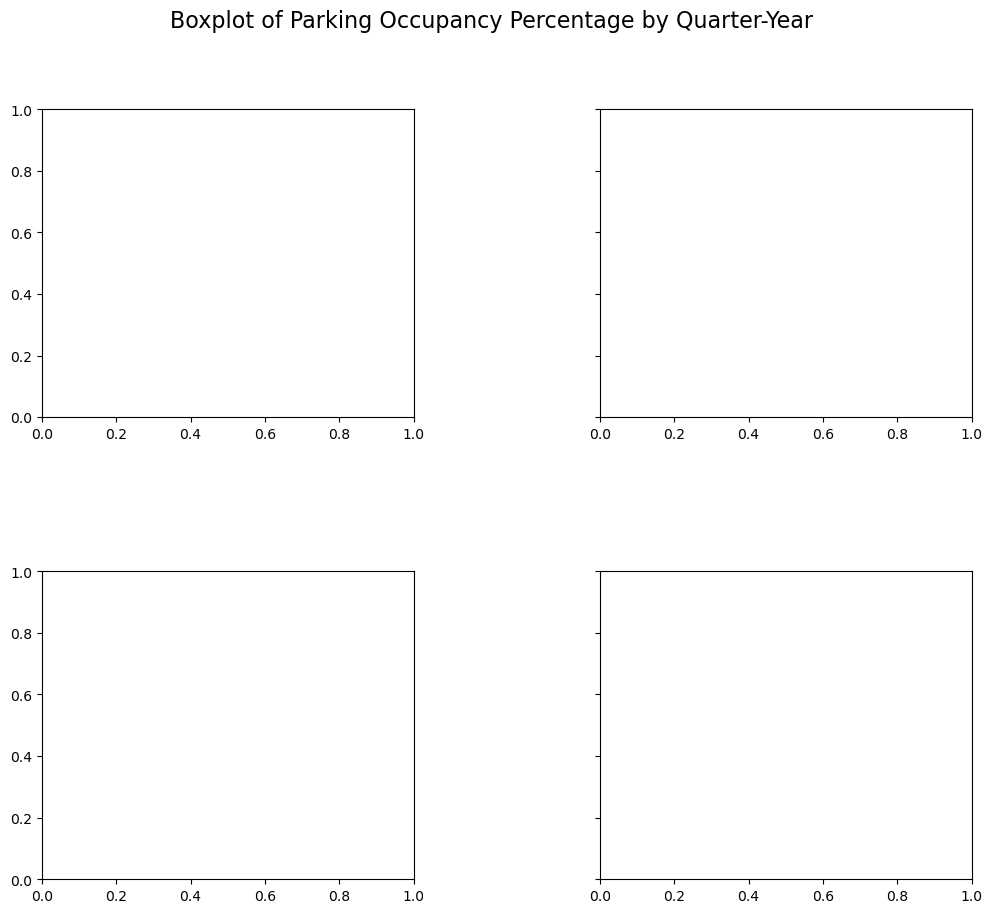

In [32]:
# Create the 2x2 grid of subplots for boxplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Boxplot of Parking Occupancy Percentage by Quarter-Year', fontsize=16)

# Define the quarters
quarters = ['Winter', 'Spring', 'Summer', 'Fall']

# Generate a boxplot for each quarter
for i, quarter in enumerate(quarters):
    row = i // 2
    col = i % 2
    
    # Filter the data for the specific quarter
    quarter_data = parking_data[parking_data['quarter'] == quarter]
    
    # Create the boxplot
    sns.boxplot(ax=ax[row][col], x='quarter_year', y='percent_occupied', data=quarter_data)
    
    # Set individual subplot titles
    ax[row][col].set_title(quarter)
    
    # Improve label readability
    ax[row][col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    
# Set common y-label
ax[0][0].set_ylabel('Percentage Occupied')
ax[1][0].set_ylabel('Percentage Occupied')

# Tight layout 
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/kj/vdf5m93j2ws389qd8t2mn51m0000gn/T/ipykernel_72371/908778077.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_parking_data = parking_data.groupby(['quarter']).mean().reset_index()


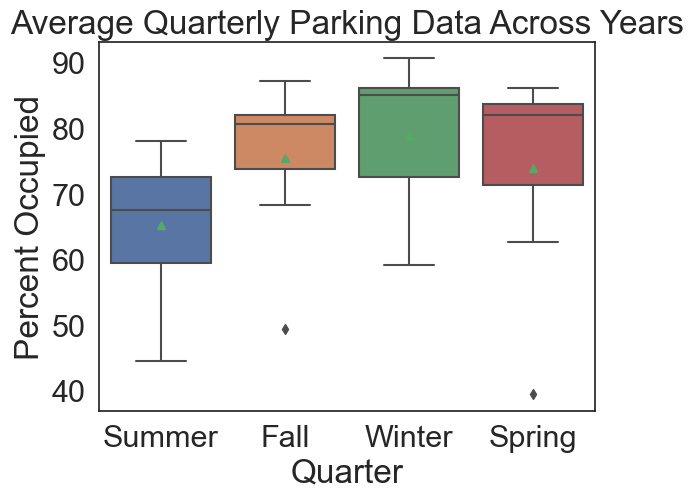

In [43]:
# find means
mean_parking_data = parking_data.groupby(['quarter']).mean().reset_index()

sns.boxplot(data=parking_data, x='quarter', y='percent_occupied', showmeans=True)
plt.title('Average Quarterly Parking Data Across Years')
plt.xlabel('Quarter')
plt.ylabel('Percent Occupied')
plt.show()

We notice that summer quarter has the lowest percentage occupied for parking. 
The boxplot displays the distribution of parking occupancy rate for different queters of the year.For the percentage per quarter, the distribution is consistance before year 2019. And all four quarters in 2019 are outliers due to covid campus shutdown.  

### Dataset 2: Number of accidents per quarter

First, we check how many accidents occurred each quarter using ```groupby```.

In [34]:
collision_data.groupby(['quarter', 'year']).size().reset_index(name='Count')

,quarter,year,Count
0,Fall,2016,126
1,Fall,2017,134
2,Fall,2018,159
3,Fall,2019,170
4,Fall,2020,87
5,Fall,2021,175
6,Fall,2022,93
7,Spring,2017,95
8,Spring,2018,101
9,Spring,2019,107


In [35]:
min = collision_data.groupby(['quarter', 'year']).size().min()
median = collision_data.groupby(['quarter', 'year']).size().median()
max = collision_data.groupby(['quarter', 'year']).size().max()
min, median, max

(54, 101.0, 175)

We can find that the minimum number of accidents is 54, the median number of accidents is 101, and the maximum number of accidents is 175 (all per quarter).

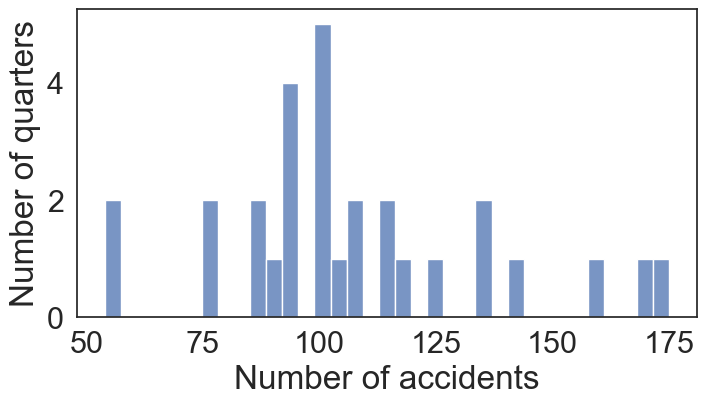

In [36]:
sns.set(font_scale=2, style="white")

plt.figure(figsize=(8, 4))
sns.histplot(data = collision_data, x = collision_data.groupby(['quarter', 'year']).size(), bins = 35)
plt.ylabel('Number of quarters')  
plt.xlabel('Number of accidents')
plt.show()

The collision data that we grouped can be plotted in a histogram to see a general range of the total number of accidents that occur in a quarter. This helps us visualize that the minimum number of accidents is roughly 50, and the maximum number of accidents is roughly 175. There aren't any extreme outliers in the data, as the data is relatively normally distributed with a slight left skew.

### Dataset 2: Number of accidents per street

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [37]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Dataset 2: Analysis of number of injured/killed per quarter

First, we use ```groupby``` to find the sum and mean number of injured/killed per quarter:

In [38]:
casualties = collision_data.copy()
casualties = casualties.assign(quarter_year=casualties['year'].astype('str')
                               + '_'
                               + casualties['quarter']
                               ).drop(columns=['quarter','year'])
casualties_gb = casualties.groupby('quarter_year').agg({
                'injured':[('injured_sum','sum'),('injured_mean','mean')],
                'killed':[('killed_sum','sum'),('killed_mean','mean')]})
casualties_gb.columns = ['injured_sum','injured_mean','killed_sum','killed_mean']
casualties_gb = casualties_gb.reset_index()
casualties_gb.head()

,quarter_year,injured_sum,injured_mean,killed_sum,killed_mean
0,2016_Fall,128,1.015873,0,0.000000
1,2016_Summer,48,0.857143,2,0.035714
2,2017_Fall,128,0.955224,2,0.014925
3,2017_Spring,89,0.936842,0,0.000000
4,2017_Summer,53,0.602273,0,0.000000


Then we draw the distributions of each statistics per quarter:

<Axes: xlabel='killed_mean', ylabel='Count'>

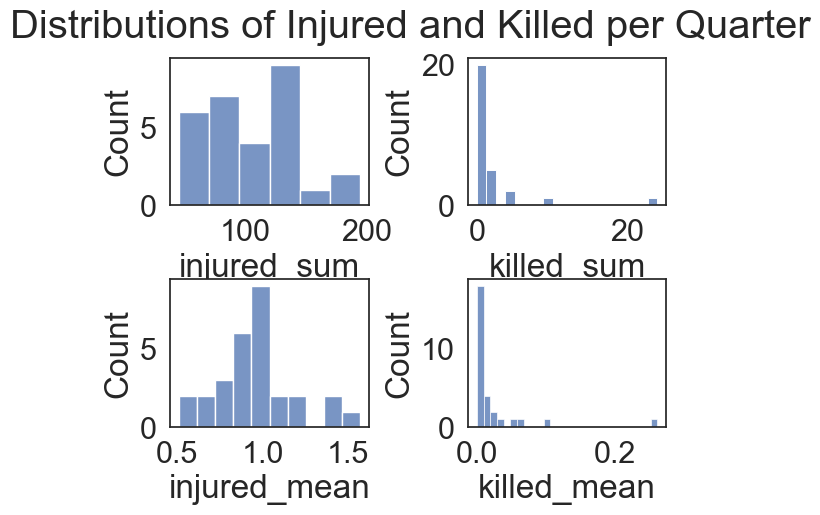

In [39]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Distributions of Injured and Killed per Quarter')
sns.histplot(ax=ax[0][0], data=casualties_gb, x='injured_sum')
sns.histplot(ax=ax[0][1], data=casualties_gb, x='killed_sum')
sns.histplot(ax=ax[1][0], data=casualties_gb, x='injured_mean')
sns.histplot(ax=ax[1][1], data=casualties_gb, x='killed_mean')

We can see that the total injured per quarter ranges from 50 to 200 across different quarters, and the mean injured per collision per quarter is somewhat normally distributed with mean around 1. 

For the total killed per quarter, we can see that the distribution is very skewed. There are two outliers indicating some large numbers of killed in collisions within a single quarter. And the distribution of the mean killed per collision per quarter shows that these two outliers are not because there are many collisions happened in that quarter, but due to one (or a few) severe collisions.

# Ethics & Privacy

Our proposed project involves the analysis of data related to parking occupancy on the UCSD campus and traffic incidents on nearby major roads. As we conduct our analysis, we are aware of the importance of ethical standards and privacy concerns. [Deon’s ethics checklist](https://deon.drivendata.org/#data-science-ethics-checklist) provides a useful framework for investigating potential ethics or privacy issues. 

In order to avoid potential bias within our datasets, we are only utilizing datasets that are public domain and published by reputable sources. For instance, our proposed dataset providing accident information is published by the San Diego government, and our proposed dataset with UCSD parking data is published by UCSD campus authorities. The traffic incident information is not directly collected from individuals, but instead published to public domain at the time of the accident when collected. We acknowledge that some information available in the dataset may be sensitive, though not personally identifying information (PII), and we are excluding this information from our analysis. The parking occupancy data is collected by [“cameras embedded with artificial intelligence”](https://today.ucsd.edu/story/parking-on-campus-theres-an-app-for-that#:~:text=IT%20Services%20enlisted%20student%20developers,which%20parking%20spaces%20are%20available). The parking occupancy data does not collect PII, and no PII information is published with the dataset. 

We acknowledge that there may be unintended consequences as a result of our data analysis. While inferences may be extracted from our conclusions, our data analysis does not aim to make a generalization about the safety of the roads surrounding UCSD. Our analysis intends to be informative about one facet that may contribute to road safety. Correlation does not elude causation, thus, we are simply exploring potential correlation between our datasets. Furthermore, confounds may be present within our data analysis. Relationships between holidays/events and parking/collisions may be present, which could influence our data analysis. Since the data from our first dataset is grouped by each academic quarter of UCSD, there may be outlier data points that we cannot account for because the data has been generalized to a period of roughly three months, and we cannot see any variations that month-to-month events might present. Lastly, our intent is not to influence drivers to shift their driving habits, but instead, to provide insight into potential relationships between driving habits. 

We aim to be transparent in our methodology, and will provide a summary and details of the steps we complete in our analysis, as well as any concerns that may arise throughout our process. Our project's primary goal is to contribute positively to public safety and traffic efficiency while minimizing any potential harm.

# Team Expectations 

1. Communicate through group messages when we are making changes to the project (on github documents). 
2. Meet weekly at a time we all agree on
3. Equitable contribution
    - Each team member works through their portion(s) of the project equally 
    - If issues arise, communicate sooner than later
    - Ask another team member for help/advice if you run into any issues

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
|  10/23  |  5 PM  | Read & think about previous projects given to review; brainstorm topics/questions  | Determine best form of communication; Complete project review; Discuss possible final project topics |
|  10/30  |  5 PM  |  Brainstorm final project topics | Decide final project topic and split up work for project proposal |
|  11/1  |  5 PM  | Work on project proposal | Finalize and submit final project proposal |
|  11/11  |  6 PM  | Have project proposal submitted; Search for datasets  | Discuss wrangling and possible analytical approaches; Assign group members to lead each specific part |
|  11/13  |  5 PM  | Work on data descriptions | Start cleaning/wrangling datasets |
|  11/15  |  5 PM  | Finish data descriptions and initial cleaning/wrangling for data checkpoint | Finalize data checkpoint |
|  11/27  |  10 AM  | Begin planning EDA and analysis | Discuss EDA and split up visualization work |
|  11/28  |  11 AM  | Finalize wrangling/EDA for EDA checkpoint | Discuss analysis/results; Discuss/edit full project |
|  12/4  |  5 PM  | Complete analysis; Draft results/conclusion/discussion | Record the final project video |